In [10]:
import pandas as pd
import numpy as np
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

##### Load dataset

In [11]:
# OAI dataset
df1 = pd.read_csv("../0.Prepration_OAI_datasetsS/Stuff/data/allclinical00.csv").drop(["VERSION"], axis=1)
df2 = pd.read_csv("../0.Prepration_OAI_datasetsS/Stuff/data/allclinical01.csv").drop(["VERSION"], axis=1)
df3 = pd.read_csv("../0.Prepration_OAI_datasetsS/Stuff/data/enrollees.csv").drop(["Unnamed: 0", "VERSION"], axis=1)
print("OAI df1 shape:", df1.shape)
print("OAI df2 shape:", df2.shape)
print("OAI df3 shape:", df3.shape)
print("--------------------------------------------")
# GLAD dataset:
dfg = pd.read_stata("data/GLAD/GladWithRejion_030323_updated.dta")
print("GLAD shape:", dfg.shape)

OAI df1 shape: (4796, 1186)
OAI df2 shape: (4796, 574)
OAI df3 shape: (4796, 59)
--------------------------------------------
GLAD shape: (66215, 1240)


#### OAI:

##### OAI prepration and create 1 dataset from 3:

In [12]:
dfs = [df1, df2, df3]
for i in dfs:
    print(i.shape)

(4796, 1186)
(4796, 574)
(4796, 59)


In [13]:
##### checking common columns:
# Find common columns
common_columns = df1.columns.intersection(df3.columns)
print("Common columns in two datasets:", common_columns)

Common columns in two datasets: Index(['ID'], dtype='object')


In [14]:
# Merge 3 datasets:
df = reduce(lambda left, right: pd.merge(left, right, on='ID'), dfs)
print("OAI shape after merging 3 datasets:", df.shape)

OAI shape after merging 3 datasets: (4796, 1817)


##### Check NaN value in PA variables:

In [15]:
# Check missing values:
# Missing value in Physical activity variables:
variables = [
    "P02ACTRISK", "P02PA1", "P02PA2", "P02PA3", "P02PA4", "V00HOUACT1", "V00HOUACT2", "V00HOUACT3", "V00HOUACT4", "V00HOUACT5", 
    "V00HOUACT6", "V00PA130", "V00PA130CV", "V00PA130NM", "V00PA230", "V00PA230CV", "V00PA330", "V00PA330CV", "V00PA430", "V00PA430CV", 
    "V00PA530", "V00PA530CV", "V00PASE", "V00PASE1", "V00PASE1HR", "V00PASE2", "V00PASE2HR", "V00PASE3", "V00PASE3HR", "V00PASE4", 
    "V00PASE4HR", "V00PASE5", "V00PASE5HR", "V00PASE6", "V00PASE6HR", "V00WKHR7CV", "V00WORK7", "V00WORKAMT"
]

for variable in variables:
    if variable in df.columns:
        missing_count = df[variable].isna().sum()
        print(f"Missing values in {variable}: {missing_count}")
    else:
        print(f"{variable} is not a column in the DataFrame")


Missing values in P02ACTRISK: 31
Missing values in P02PA1: 24
Missing values in P02PA2: 19
Missing values in P02PA3: 34
Missing values in P02PA4: 45
Missing values in V00HOUACT1: 2
Missing values in V00HOUACT2: 4
Missing values in V00HOUACT3: 3
Missing values in V00HOUACT4: 3
Missing values in V00HOUACT5: 4
Missing values in V00HOUACT6: 4
Missing values in V00PA130: 4
Missing values in V00PA130CV: 9
Missing values in V00PA130NM: 14
Missing values in V00PA230: 9
Missing values in V00PA230CV: 14
Missing values in V00PA330: 8
Missing values in V00PA330CV: 12
Missing values in V00PA430: 13
Missing values in V00PA430CV: 24
Missing values in V00PA530: 16
Missing values in V00PA530CV: 20
Missing values in V00PASE: 29
Missing values in V00PASE1: 2
Missing values in V00PASE1HR: 34
Missing values in V00PASE2: 6
Missing values in V00PASE2HR: 740
Missing values in V00PASE3: 1
Missing values in V00PASE3HR: 4069
Missing values in V00PASE4: 0
Missing values in V00PASE4HR: 3989
Missing values in V00PA

In [16]:
# number of NaN value:
print(df.V00PASE.isna().sum())
# drop NaN value
df = df.dropna(subset=['V00PASE', 'V01PASE'])
print(df.V00PASE.isna().sum())

29
0


In [17]:
print(df.V00PASE.isna().sum())
print(df.V01PASE.isna().sum())

0
0


In [18]:
# create a csv from merging:
df.to_csv("../3.Changes_in_PA_Scripts/outcomes/data/1.merged_three_OAI.csv", index=False)

##### Distribution of age in OAI and Glad:

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


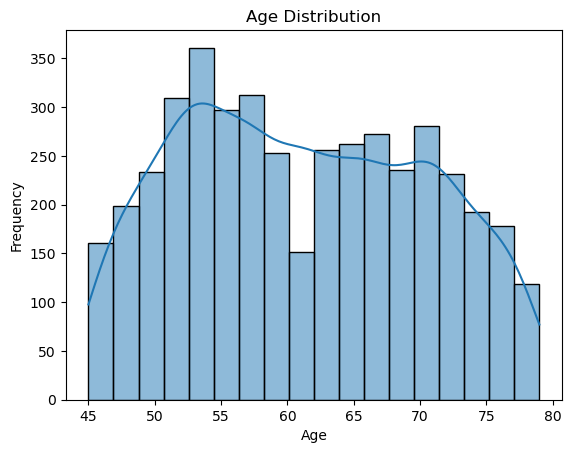

In [19]:
sns.histplot(df['V00AGE'], kde=True) # kde=True adds a density curve
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


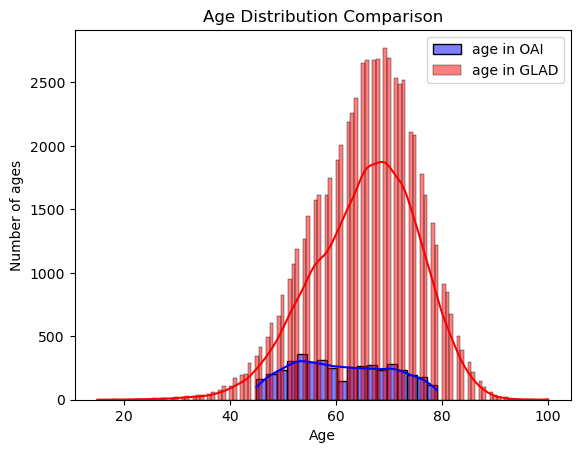

In [20]:
# Plotting the age distribution from df
sns.histplot(df['V00AGE'], kde=True, color='blue', label='age in OAI', alpha=0.5) # alpha is for transparency

# Plotting the age distribution from dfg on the same plot
sns.histplot(dfg['age'], kde=True, color='red', label='age in GLAD', alpha=0.5) # alpha is for transparency

# Adding title and labels
plt.title('Age Distribution Comparison')
plt.xlabel('Age')
plt.ylabel('Number of ages')

# Adding legend to distinguish the two distributions
plt.legend()

# Show the plot
plt.show()

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


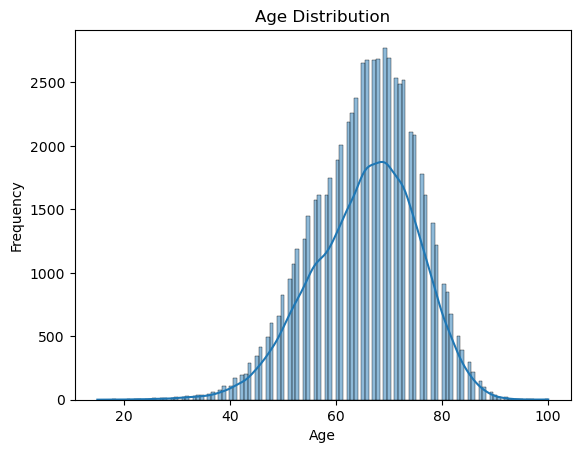

In [21]:
sns.histplot(dfg['age'], kde=True) # kde=True adds a density curve
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [22]:
df.V01PASE.max()

580.0

##### Distribution of SEX in GLAD and OAI

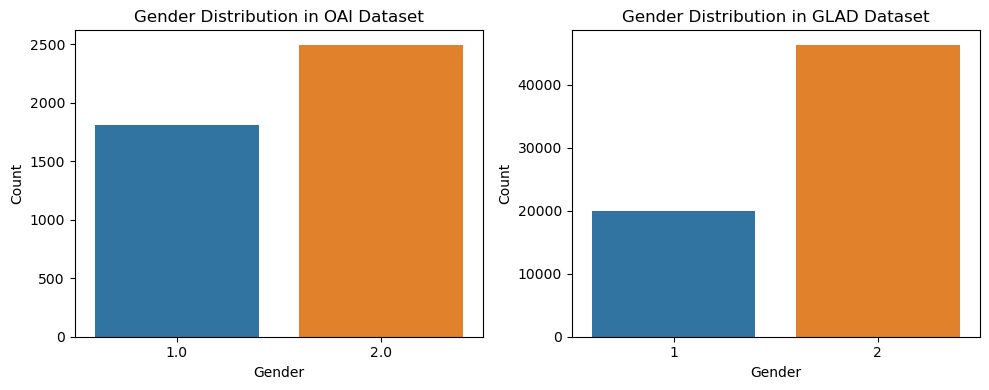

In [23]:
# Plotting gender distribution for OAI
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='P02SEX', data=df)
plt.title('Gender Distribution in OAI Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')

# Now, plot the gender distribution for the GLAD dataset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.countplot(x='gender', data=dfg)
plt.title('Gender Distribution in GLAD Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_96527/1798165406.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['Gender'] = dfg['gender'].map(gender_map)
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_96527/1798165406.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['Dataset'] = 'GLAD'


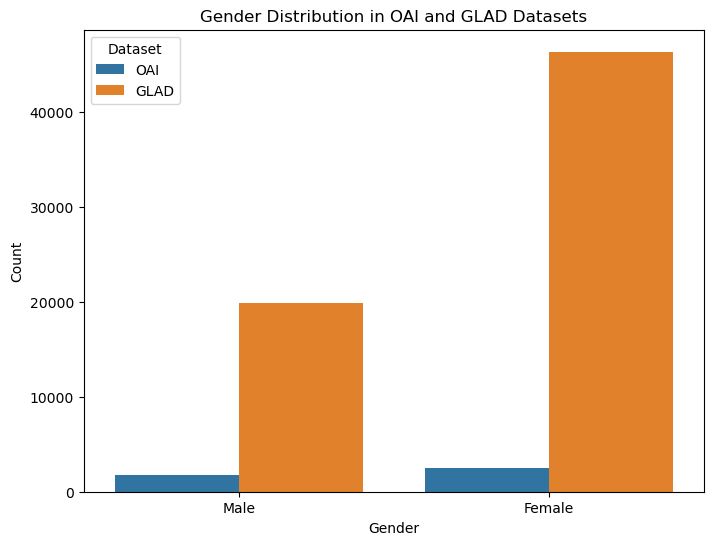

In [24]:
# Map gender numeric codes to more descriptive labels
gender_map = {1: 'Male', 2: 'Female'}
df['Gender'] = df['P02SEX'].map(gender_map)
dfg['Gender'] = dfg['gender'].map(gender_map)

# Combine the datasets for plotting, adding a 'Dataset' column to distinguish between them
df['Dataset'] = 'OAI'
dfg['Dataset'] = 'GLAD'
combined_df = pd.concat([df[['Gender', 'Dataset']], dfg[['Gender', 'Dataset']]])

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_df, x='Gender', hue='Dataset')
plt.title('Gender Distribution in OAI and GLAD Datasets')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


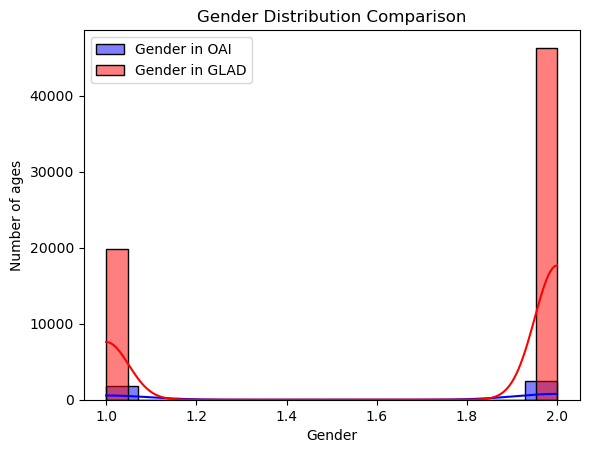

In [25]:
# Plotting the Gender distribution from df
sns.histplot(df['P02SEX'], kde=True, color='blue', label='Gender in OAI', alpha=0.5) # alpha is for transparency

# Plotting the Gender distribution from dfg on the same plot
sns.histplot(dfg['gender'], kde=True, color='red', label='Gender in GLAD', alpha=0.5) # alpha is for transparency

# Adding title and labels
plt.title('Gender Distribution Comparison')
plt.xlabel('Gender')
plt.ylabel('Number of ages')

# Adding legend to distinguish the two distributions
plt.legend()

# Show the plot
plt.show()

##### Check and remove NaN value in PHASE variables:

In [26]:
# Removing rows where V00PASE1 is NaN
print("Number of NaN value after removing them:")
df = df.dropna(subset=['V00PASE1'])
print("V00PASE1: ", df.V00PASE1.isna().sum())
print("V00PASE1: ", df.V00PASE1.unique())

phase_variable = ["V00PASE2" ,"V00PASE3" ,"V00PASE4" ,"V00PASE5" ,"V00PASE6", "V00PASE"]
# Drop rows where any of the specified columns have NaN values
df = df.dropna(subset=phase_variable)

for i in phase_variable:
    print(f"{i}: {df[i].isna().sum()}")
    print(f"{i}: {df[i].unique()}")
    
print("---------------------------")
    
print("shape of OAI dataset:", df.shape)
print("0:Never,    1: Seldorn(1-2 days),    2: Sometimes(3-4 days),     3: Often(5-7 days)")

Number of NaN value after removing them:
V00PASE1:  0
V00PASE1:  [3. 2. 1. 0.]
V00PASE2: 0
V00PASE2: [3. 2. 1. 0.]
V00PASE3: 0
V00PASE3: [0. 1. 2. 3.]
V00PASE4: 0
V00PASE4: [0. 1. 2. 3.]
V00PASE5: 0
V00PASE5: [3. 0. 1. 2.]
V00PASE6: 0
V00PASE6: [2. 0. 3. 1.]
V00PASE: 0
V00PASE: [132. 190. 157. 250. 164. 128. 280. 156. 147. 116.  54. 202. 152.  34.
 114. 176. 159.  27. 370. 210. 214. 261. 175. 161.  43. 111. 251.  18.
 145.  55. 360.  25. 144. 180. 293. 126. 184. 225.  67. 137.  44.  58.
 215. 172.  96. 171. 200. 101. 231.  73.  90. 113. 258. 121. 143. 207.
 148. 100. 187. 295. 108.  32. 115. 170.  86.  79. 216. 154. 167.  26.
 254. 273. 146. 188. 439.  30.  88. 201. 139. 153. 290. 138. 151. 131.
 265.  35.  87. 454. 112.   0.  37. 289.  91. 166. 194. 149.  98. 140.
 227. 120. 235. 123.  60.  93.  82.  64. 173. 272. 236. 192.  97. 118.
 240. 102.  59. 275. 219. 346.  74. 109. 129. 222. 150. 279. 196. 134.
 141.  62. 130.  99. 268. 237. 169.  47. 155. 226. 388.  68. 182. 127.
 332. 106. 

##### Analyze the distribution of Physical Activity Scale for the Elderly (PASE)

In [27]:
pa_variables = [ "P02ACTRISK" ,"P02PA1" ,"P02PA2" ,"P02PA3" ,"P02PA4" ,"V00HOUACT1" ,"V00HOUACT2" ,
                "V00HOUACT3" ,"V00HOUACT4" ,"V00HOUACT5" ,"V00HOUACT6" ,"V00PA130" ,"V00PA130CV" ,
                "V00PA130NM" ,"V00PA230" ,"V00PA230CV" ,"V00PA330" ,"V00PA330CV" ,"V00PA430" ,
                "V00PA430CV" ,"V00PA530" ,"V00PA530CV" ,"V00PASE" ,"V00PASE1" ,"V00PASE1HR" ,
                "V00PASE2" ,"V00PASE3" ,"V00PASE4" ,"V00PASE5" ,"V00PASE6" ,"V00WKHR7CV" ,"V00WORK7"
]

In [28]:
#### Conditions based on Marica’s mapping

def determine_category(row):
    conditions = {1: {'V00PASE1': 3, 'V00PASE2': 0, 'V00PASE3': 0, 'V00PASE4': 0, 'V00PASE5': 0, 'V00PASE6': 0},
                 2: {'V00PASE1': 2, 'V00PASE2': 1, 'V00PASE3': 1, 'V00PASE4': 1, 'V00PASE5': 1, 'V00PASE6': 1},
                 3: {'V00PASE1': 1, 'V00PASE2': 2, 'V00PASE3': 2, 'V00PASE4': 2, 'V00PASE5': 2, 'V00PASE6': 2},
                 4: {'V00PASE1': 0, 'V00PASE2': 3, 'V00PASE3': 3, 'V00PASE4': 3, 'V00PASE5': 3, 'V00PASE6': 3}}
    for k, condition in conditions.items():
        if all(row[column] == value for column, value in condition.items()):
            return k
    return None

# Apply the function across the DataFrame row-wise
df['test_variable_marica'] = df.apply(determine_category, axis=1)

print(df['test_variable_marica'].value_counts())
print(df['test_variable_marica'].unique())

test_variable_marica
1.0    267
Name: count, dtype: int64
[nan  1.]


In [29]:
# If you want check per condition seperately:
((df['V00PASE1'] == 3) & (df['V00PASE2'] == 0) & (df['V00PASE3'] == 0) & (df['V00PASE4'] == 0) & (df['V00PASE5'] == 0) & (df['V00PASE6'] == 0)).sum()

267

##### Check variable by variable (PASE): Distribution of cases in each variable by value:

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

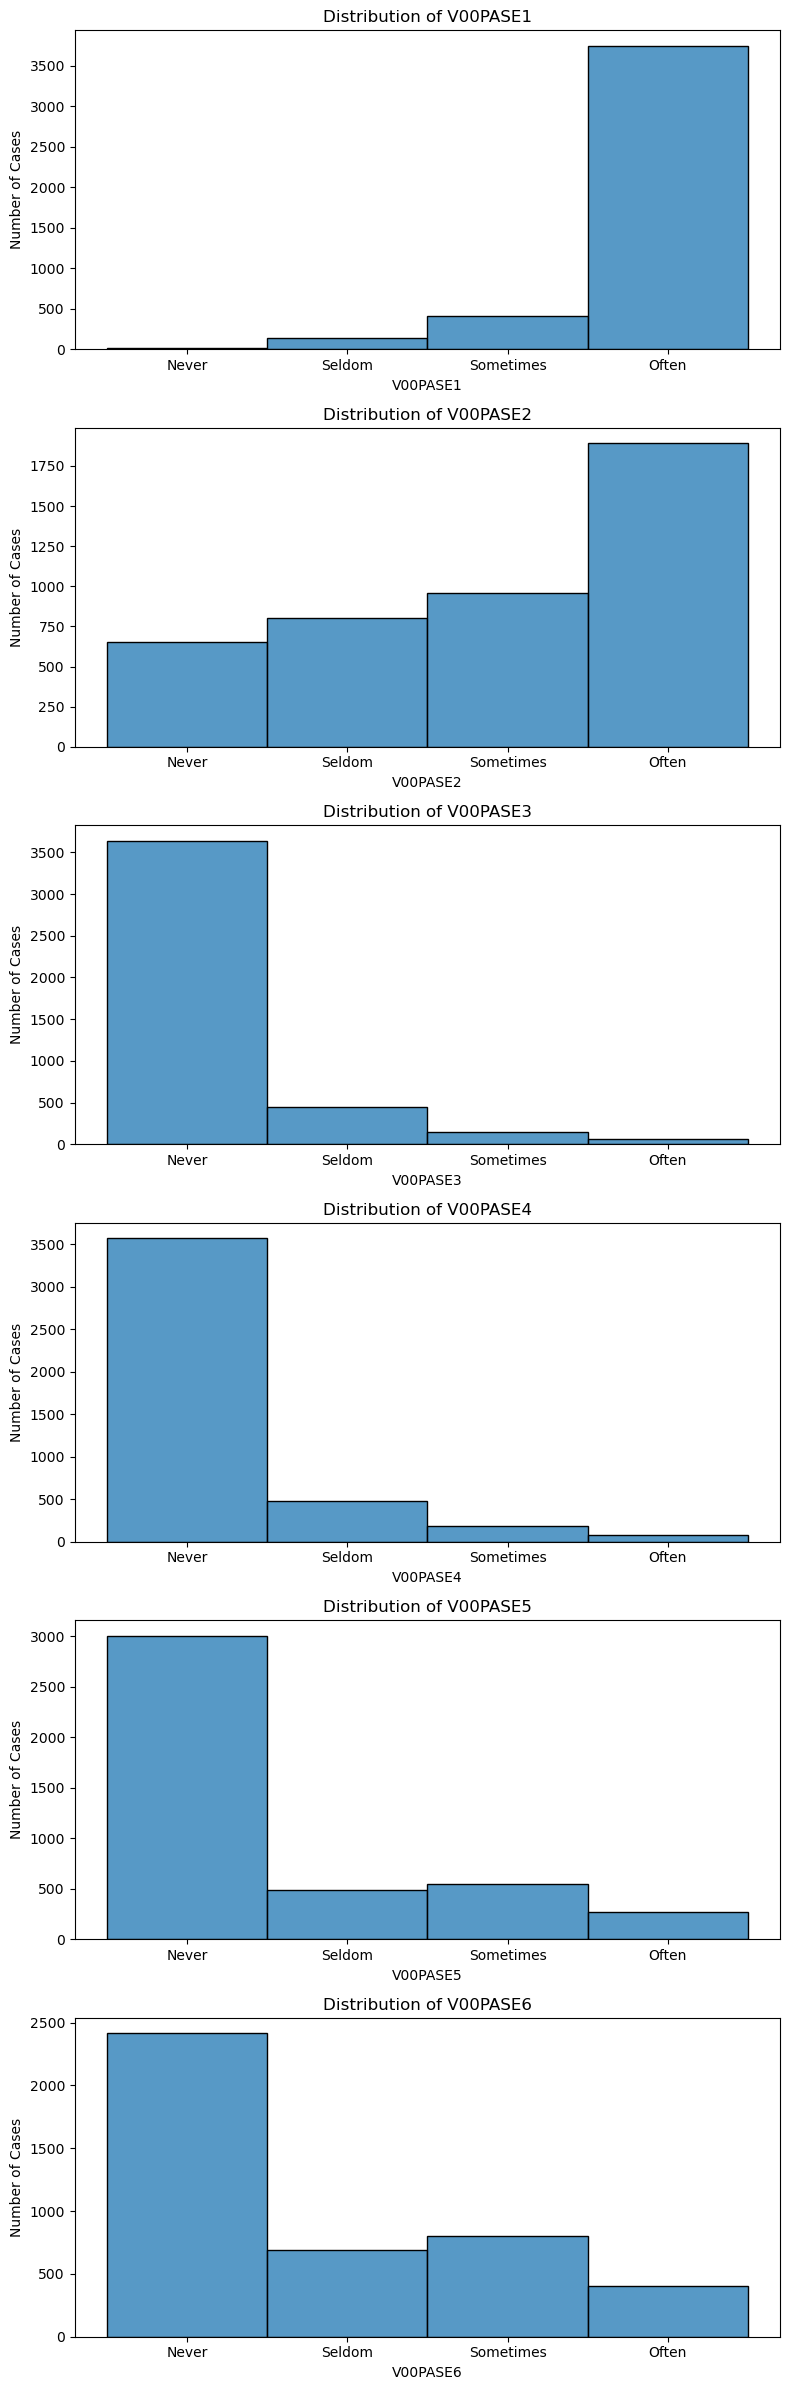

In [30]:
# Update the figure layout to have 6 rows for including V00PASE6
fig, axes = plt.subplots(6, 1, figsize=(8, 24))  # Now 6 rows, 1 column

# Add V00PASE6 to the list of variables
variables = ['V00PASE1', 'V00PASE2', 'V00PASE3', 'V00PASE4', 'V00PASE5', 'V00PASE6']
labels = ['Never', 'Seldom', 'Sometimes', 'Often']

for i, var in enumerate(variables):
    # Plot each variable on its own subplot
    sns.histplot(df[var], discrete=True, kde=False, ax=axes[i])
    
    # Setting the title for each subplot
    axes[i].set_title(f'Distribution of {var}')
    
    # Modifying x-axis labels to include descriptions
    axes[i].set_xticks(ticks=[0, 1, 2, 3])
    axes[i].set_xticklabels(labels=labels)
    
    # Setting the y-axis label
    axes[i].set_ylabel('Number of Cases')

# Adjust the layout so titles and labels don't overlap
plt.tight_layout()

# Display the plot
plt.show()


##### Distribution based on another variable:

In [31]:
# often_df = df[(df['V00PASE2'] == 1) | (df["V00PASE2"] == 2)]
often_df = df[(df['V00PASE2'] == 3) | (df["V00PASE2"] == 2)]

In [32]:
def plot_histogram(often_df):
    # Assuming often_df is your DataFrame
    fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # Adjust the size as needed
    axes = axes.flatten()  # Flatten the array to make indexing easier

    for i, ax in enumerate(axes, start=1):
        column_name = f'V00PASE{i}'
        if column_name in often_df.columns:
            sns.histplot(often_df[column_name], discrete=True, kde=False, ax=ax)
            
            # Setting the title
            ax.set_title(f'Distribution of {column_name}')
            
            # Modifying x-axis labels to include descriptions
            ax.set_xticks(ticks=[0, 1, 2, 3])
            ax.set_xticklabels(labels=['Never', 'Seldom', 'Sometimes', 'Often'])
            
            # Setting the y-axis label
            ax.set_ylabel('Number of cases')
        else:
            ax.set_visible(False)  # Hide axes if the column doesn't exist

    plt.tight_layout()
    plt.show()


##### Based on walking often or walking sometimes:

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

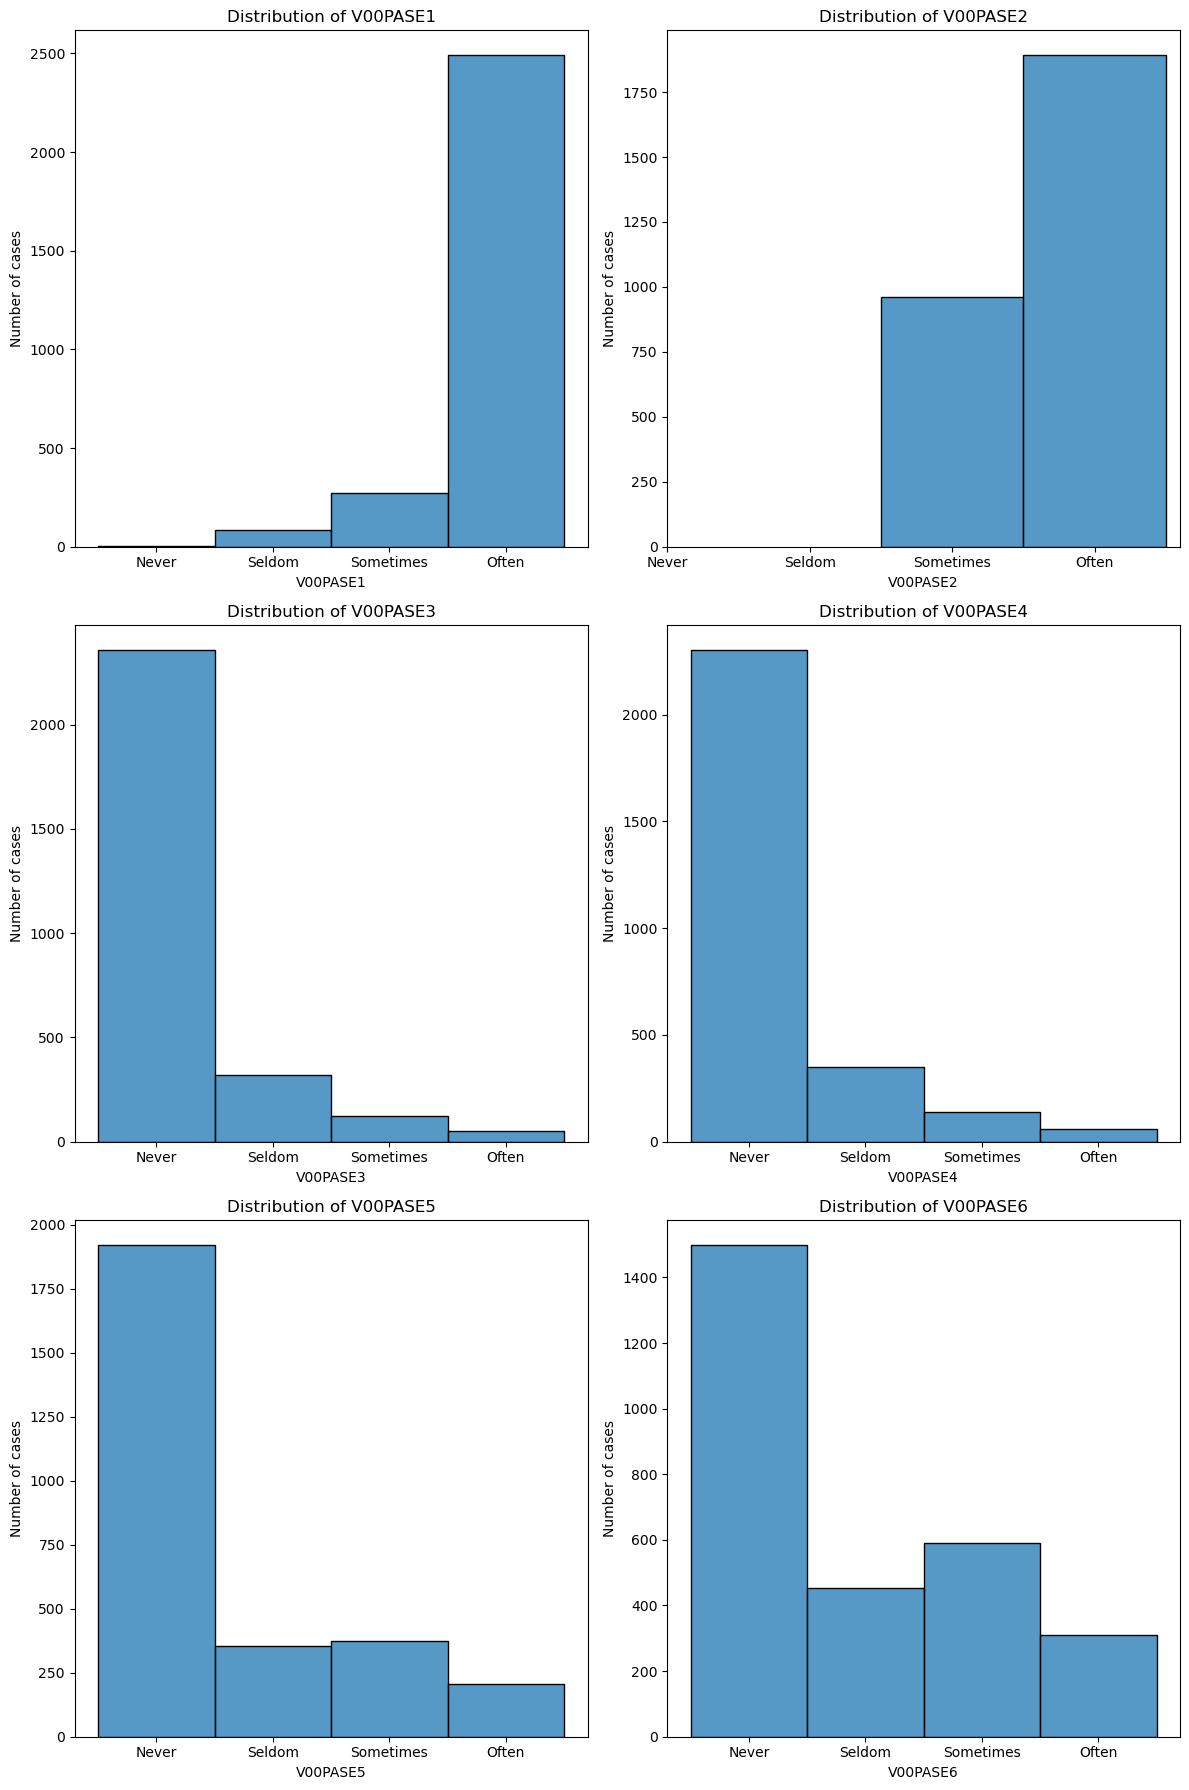

In [33]:
often_df = df[(df['V00PASE2'] == 3) | (df["V00PASE2"] == 2)]
plot_histogram(often_df)

In [34]:
df.shape

(4307, 1820)

##### Distribution of other PA variables:

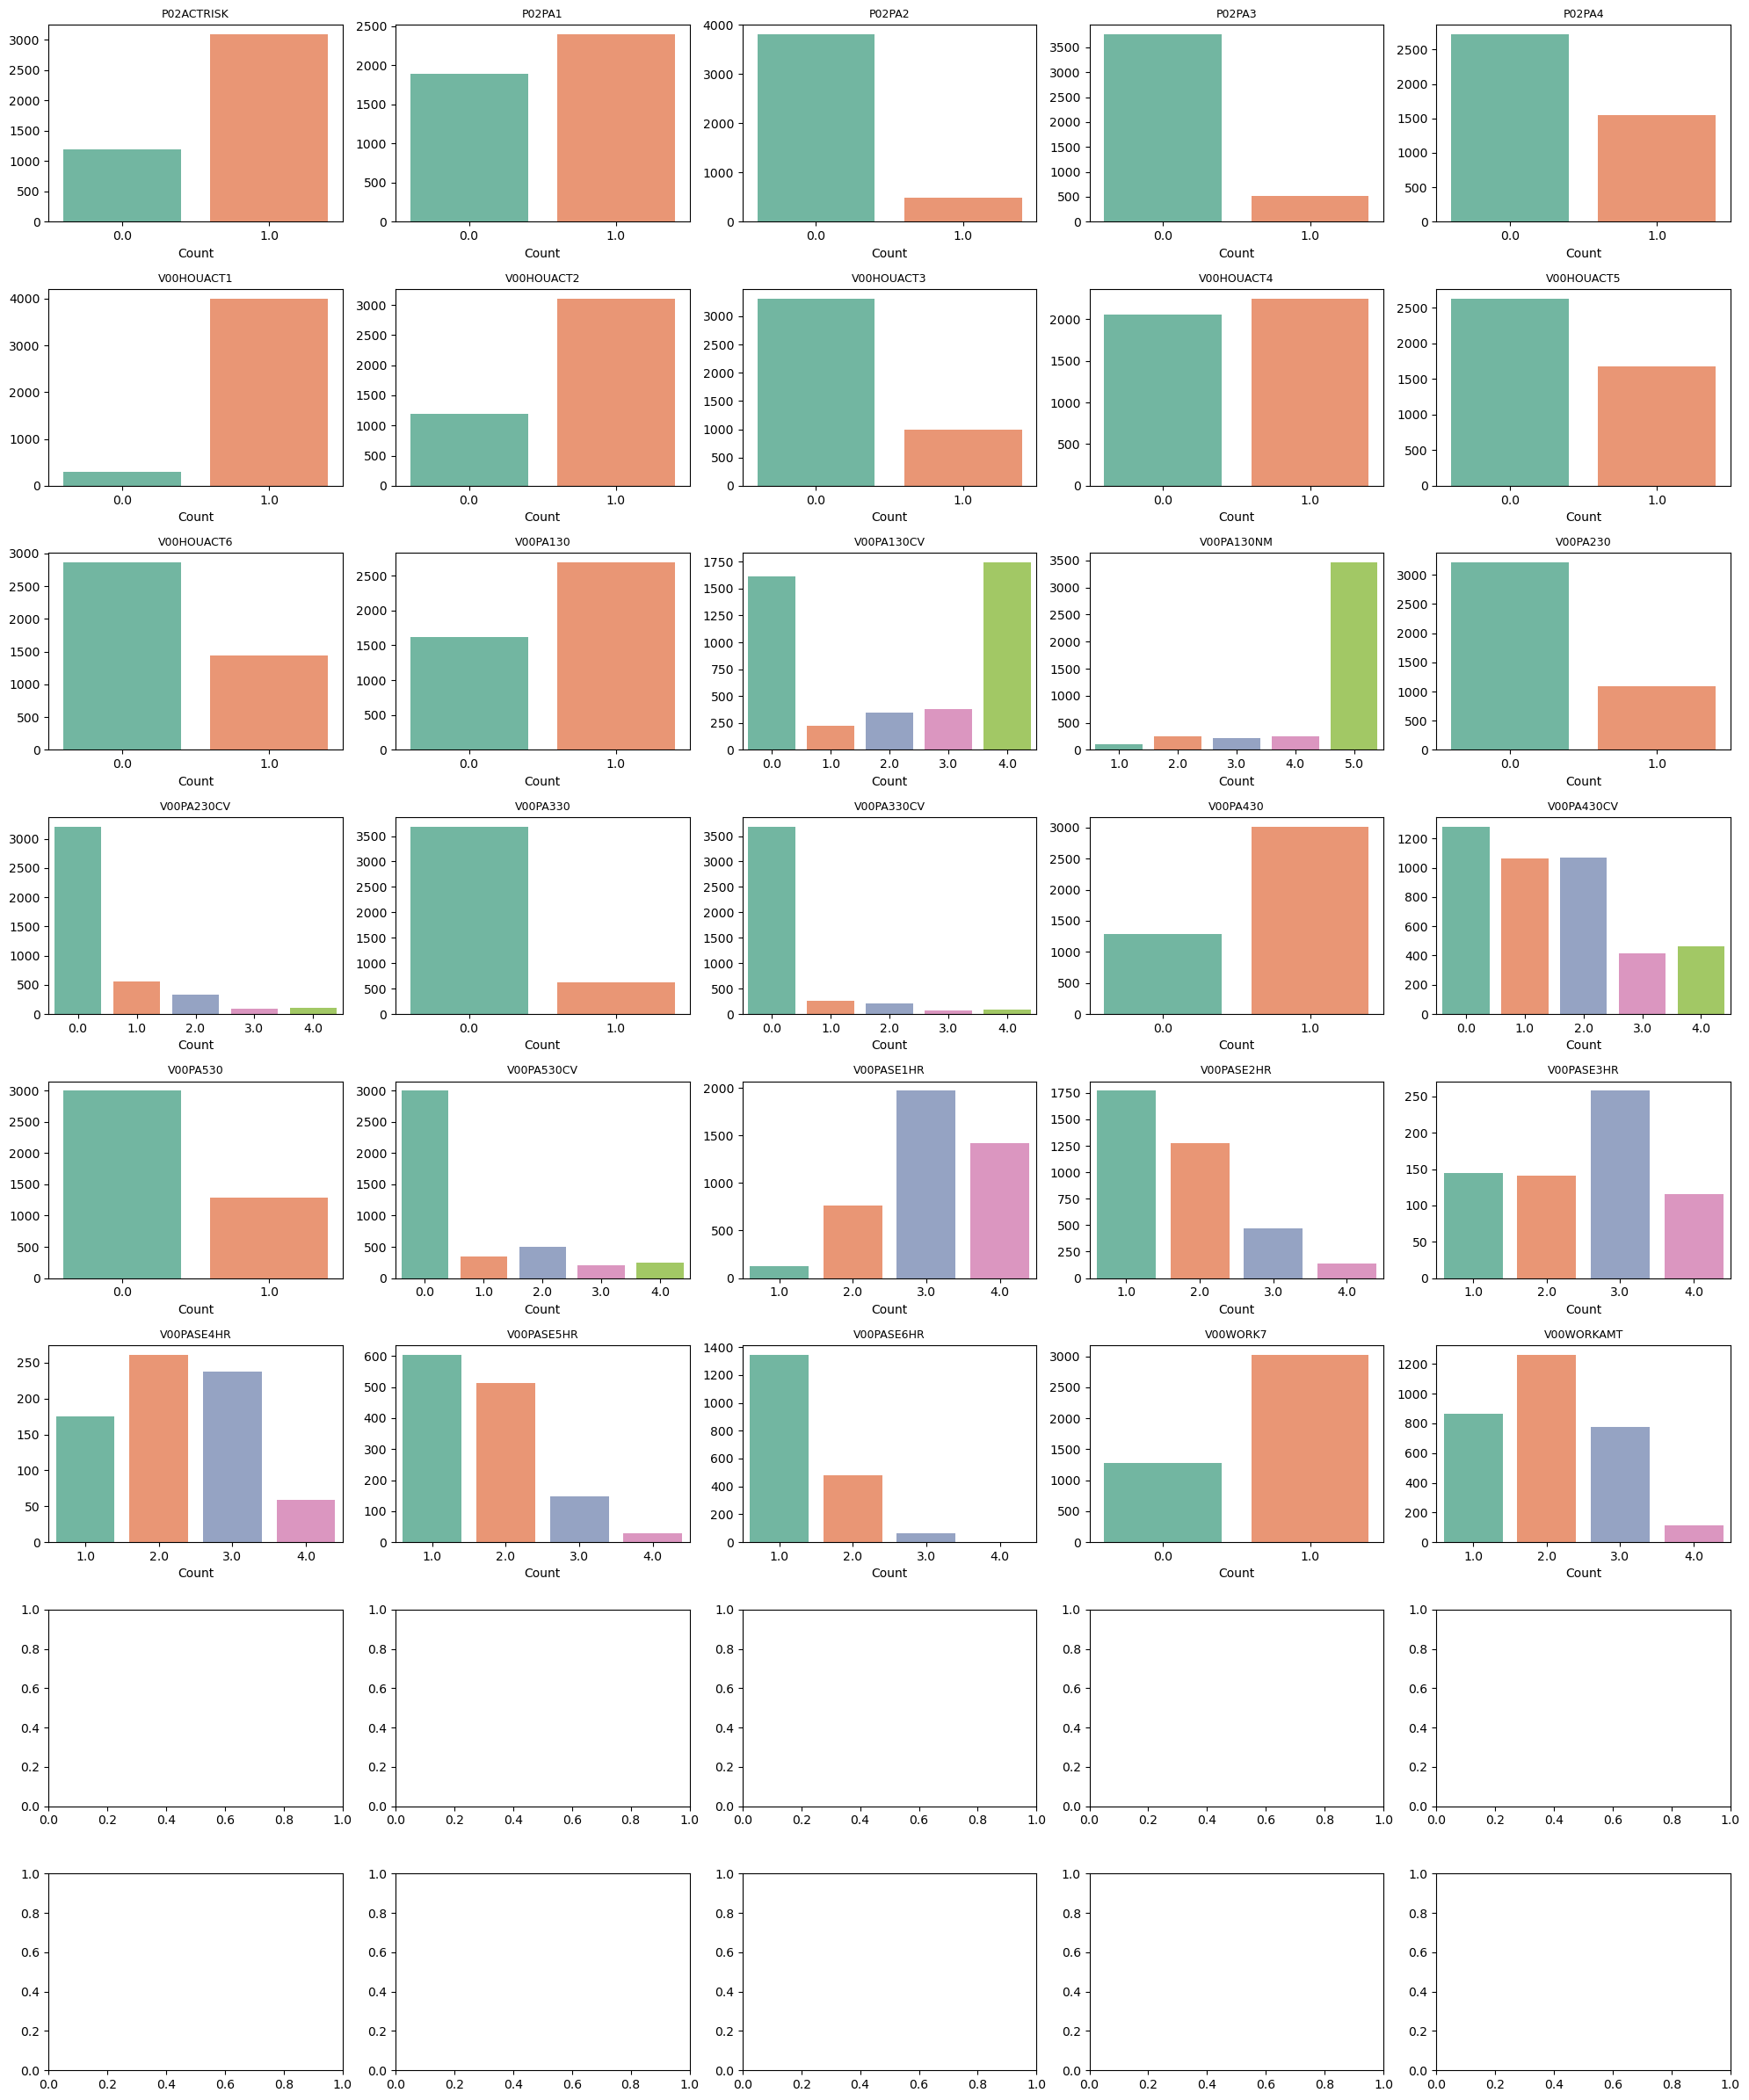

In [35]:
variables = [
    "P02ACTRISK", "P02PA1", "P02PA2", "P02PA3", "P02PA4",
    "V00HOUACT1", "V00HOUACT2", "V00HOUACT3", "V00HOUACT4", "V00HOUACT5", "V00HOUACT6",
    "V00PA130", "V00PA130CV", "V00PA130NM", "V00PA230", "V00PA230CV", "V00PA330", "V00PA330CV",
    "V00PA430", "V00PA430CV", "V00PA530", "V00PA530CV", "V00PASE1HR", "V00PASE2HR", "V00PASE3HR",
    "V00PASE4HR", "V00PASE5HR", "V00PASE6HR", "V00WORK7", "V00WORKAMT"
]


# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 24))  # Adjust as necessary
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, variable in enumerate(variables):
    if variable in df.columns:
        # Plotting the countplot for each variable horizontally
        sns.countplot(x=variable, data=df, ax=axes[i], palette='Set2', orient='h')
        axes[i].set_title(variable, fontsize=9)
        axes[i].set_ylabel('')
        axes[i].set_xlabel('Count')
    else:
        # In case the variable is not in the DataFrame, hide the axis
        axes[i].set_visible(False)

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
df.shape

(4307, 1820)

In [37]:
df.V01PASE.max()

580.0

##### Distribution of V00PASE: Physical Activity Scale for the Elderly (PASE) score (calc)

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


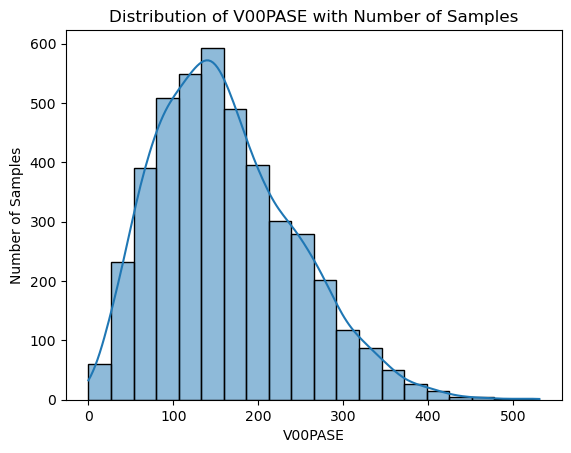

In [38]:
sns.histplot(df['V00PASE'], kde=True, bins=20)  # kde=True adds a Kernel Density Estimate overlay
plt.title('Distribution of V00PASE with Number of Samples')
plt.xlabel('V00PASE')
plt.ylabel('Number of Samples')
plt.show()

#### Quintiling Variable Values

##### OAI

In [39]:
# # Convert V00PASE to integer if it's not already
# df['V00PASE'] = df['V00PASE'].astype(int)

# # Use np.linspace to create bins from 0 to 531 inclusive
# bins = np.linspace(0, 531, num=6)
# df['V00PASE_quintiles'] = pd.cut(df['V00PASE'], bins=bins, labels=False, include_lowest=True)

# # Calculate the actual cut points used by pd.cut
# cut_points = pd.cut(df['V00PASE'], bins=bins).unique().sort_values()
# print("Cut points for quintiles in 'V00PASE':", cut_points)

# # Count the number of cases in each quintile
# quintile_counts = df['V00PASE_quintiles'].value_counts().sort_index()

# # Create the labels for the x-axis based on the cut points
# labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]

# # Plotting the distribution of cases within the quintiles
# plt.figure(figsize=(10, 6))
# plt.bar(labels, quintile_counts, color='skyblue')
# plt.xlabel('Quintile Ranges of V00PASE')
# plt.ylabel('Number of Cases')
# plt.title('Distribution of Cases Across V00PASE Quintiles')
# plt.xticks(rotation=45)
# plt.show()


# # Count the number of cases in each quintile
# quintile_counts = df['V00PASE_quintiles'].value_counts().sort_index()
# print("Number of cases in each quintile:")
# print(quintile_counts)


Quintile edges: [  0.  89. 132. 172. 232. 531.]


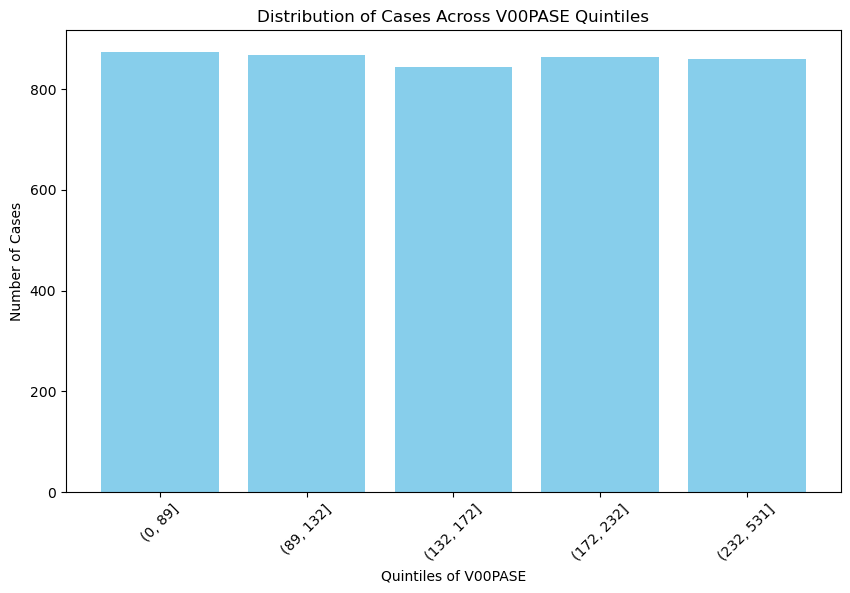

Number of cases in each quintile:
V00PASE_quintiles
0    873
1    868
2    844
3    863
4    859
Name: count, dtype: int64


In [40]:
# Use pd.qcut to divide the data into quintiles
df['V00PASE_quintiles'], bins = pd.qcut(df['V00PASE'], 5, labels=False, retbins=True) 

# The bins here represent the edges of the quintiles
print("Quintile edges:", bins)

# Count the number of cases in each quintile
quintile_counts = df['V00PASE_quintiles'].value_counts().sort_index()

# Plotting the distribution of cases within the quintiles
plt.figure(figsize=(10, 6))

# Generate labels for each quintile based on the bin edges
labels = [f"({int(bins[i])}, {int(bins[i+1])}]" for i in range(len(bins)-1)]

plt.bar(labels, quintile_counts, color='skyblue', align='center')
plt.xlabel('Quintiles of V00PASE')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases Across V00PASE Quintiles')
plt.xticks(rotation=45)
plt.show()


# Count the number of cases in each quintile
quintile_counts = df['V00PASE_quintiles'].value_counts().sort_index()
print("Number of cases in each quintile:")
print(quintile_counts)

Quintile edges: [  0.  84. 125. 170. 228. 580.]


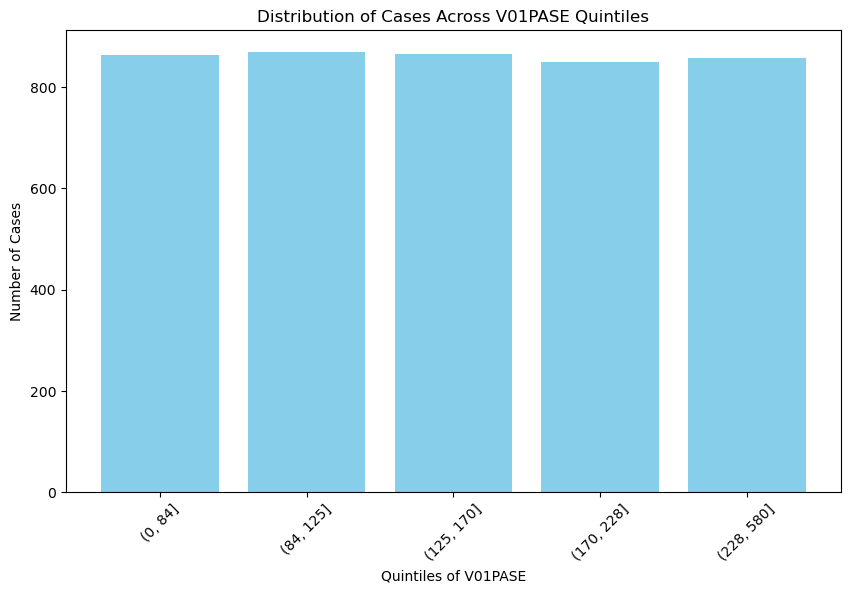

Number of cases in each quintile:
V00PASE_quintiles
0    873
1    868
2    844
3    863
4    859
Name: count, dtype: int64


In [41]:
# # Convert V01PASE to integer if it's not already
df['V01PASE'] = df['V01PASE'].astype(int)
# Use pd.qcut to divide the data into quintiles
df['V01PASE_quintiles'], bins = pd.qcut(df['V01PASE'], 5, labels=False, retbins=True) 

# The bins here represent the edges of the quintiles
print("Quintile edges:", bins)

# Count the number of cases in each quintile
quintile_counts = df['V01PASE_quintiles'].value_counts().sort_index()

# Plotting the distribution of cases within the quintiles
plt.figure(figsize=(10, 6))

# Generate labels for each quintile based on the bin edges
labels = [f"({int(bins[i])}, {int(bins[i+1])}]" for i in range(len(bins)-1)]

plt.bar(labels, quintile_counts, color='skyblue', align='center')
plt.xlabel('Quintiles of V01PASE')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases Across V01PASE Quintiles')
plt.xticks(rotation=45)
plt.show()


# Count the number of cases in each quintile
quintile_counts = df['V00PASE_quintiles'].value_counts().sort_index()
print("Number of cases in each quintile:")
print(quintile_counts)

In [42]:
print(df.V00PASE_quintiles.unique())
print(df.V01PASE_quintiles.unique())

[1 3 2 4 0]
[1 3 4 2 0]


##### Increasing & Decreasing

In [43]:
df['activity_change'] = df['V01PASE_quintiles'] - df['V00PASE_quintiles']


# To categorize the changes
df['change_category'] = pd.cut(df['activity_change'], bins=[-5, -1, 0, 4], labels=['Decrease', 'No change', 'Increase'])

# Count the number of individuals in each category
category_counts = df['change_category'].value_counts()

# Output the results
print(category_counts)


change_category
No change    1757
Decrease     1278
Increase     1272
Name: count, dtype: int64


change_category
No change    1757
Decrease     1278
Increase     1272
Name: count, dtype: int64
---------
change_category
No change    40.794056
Decrease     29.672626
Increase     29.533318
Name: count, dtype: float64
---------


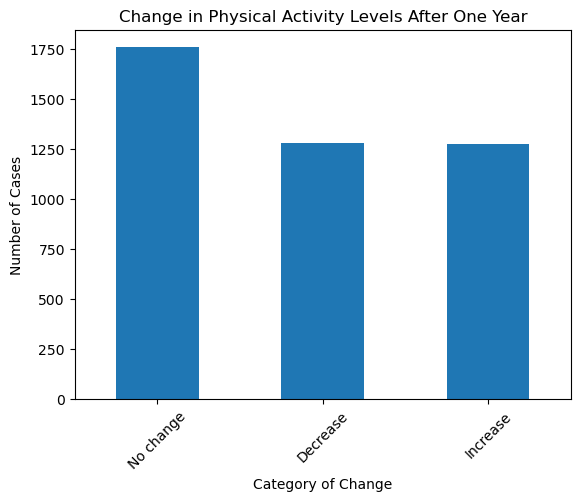

In [44]:
category_counts = df['change_category'].value_counts()
print(category_counts)

print("---------")

category_percentages = (category_counts / df['change_category'].notnull().sum()) * 100
print(category_percentages)

print("---------")

category_counts.plot(kind='bar')
plt.title('Change in Physical Activity Levels After One Year')
plt.xlabel('Category of Change')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()



##### Tertile PASE 

V00PASE_Group
Middle 70%     0.699094
Lowest 15%     0.152078
Highest 15%    0.148827
Name: proportion, dtype: float64
V00PASE_Group
Lowest 15%      655
Middle 70%     3011
Highest 15%     641
Name: count, dtype: int64


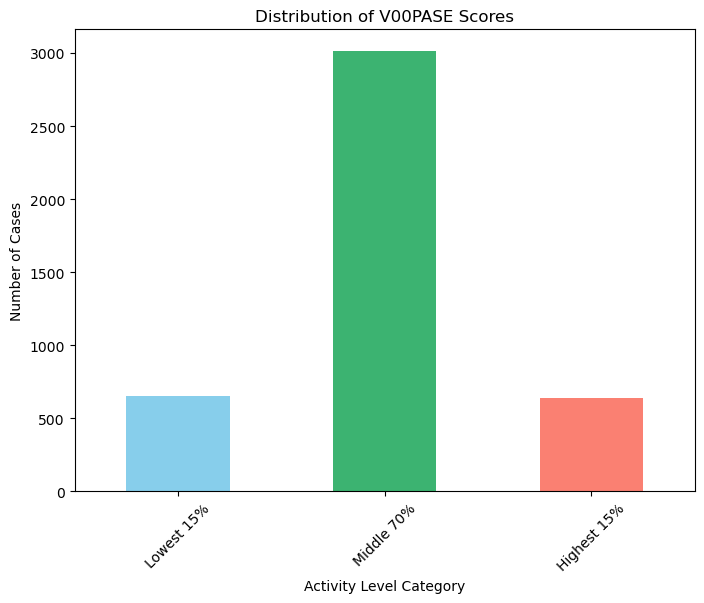

Lowest 15% Value Range: 0.0 to 76.0
Middle 70% Value Range: 76.0 to 252.0
Highest 15% Value Range: 252.0 to 531.0


In [45]:
# Calculate quantiles to find the thresholds for the lowest 15%, highest 15%, and the middle 70%
quantiles = df['V00PASE'].quantile([0.15, 0.85])

# Use pd.cut to categorize the subjects based on the calculated quantiles
# We define explicit bins to ensure that the top 15% and bottom 15% are captured correctly, with the rest being the middle 70%
bins = [df['V00PASE'].min(), quantiles[0.15], quantiles[0.85], df['V00PASE'].max()]
labels = ['Lowest 15%', 'Middle 70%', 'Highest 15%']
df['V00PASE_Group'] = pd.cut(df['V00PASE'], bins=bins, labels=labels, include_lowest=True)

# Display the distribution of subjects across the groups
print(df['V00PASE_Group'].value_counts(normalize=True))  # This will show the proportion of each group

# Count the number of cases in each group
group_counts = df['V00PASE_Group'].value_counts()

# Sort the index to ensure the plot is ordered correctly
group_counts = group_counts.sort_index()

# Print the number of cases in each group
print(group_counts)

# Create the plot
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['skyblue', 'mediumseagreen', 'salmon'])

plt.title('Distribution of V00PASE Scores')
plt.xlabel('Activity Level Category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)

# Show the plot
plt.show()



# Extract the bins array used in pd.cut
bins = [df['V00PASE'].min(), quantiles[0.15], quantiles[0.85], df['V00PASE'].max()]

# Display the value ranges for each group
print(f"Lowest 15% Value Range: {bins[0]} to {bins[1]}")
print(f"Middle 70% Value Range: {bins[1]} to {bins[2]}")
print(f"Highest 15% Value Range: {bins[2]} to {bins[3]}")



##### Tertile UCLA

ptb_4145_Group
Middle 70%     0.519444
Lowest 15%     0.333899
Highest 15%    0.146658
Name: proportion, dtype: float64
ptb_4145_Group
Lowest 15%     18701
Middle 70%     29093
Highest 15%     8214
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_96527/628500817.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['ptb_4145_Group'] = pd.cut(dfg['ptb_4145'], bins=bins, labels=labels, include_lowest=True)


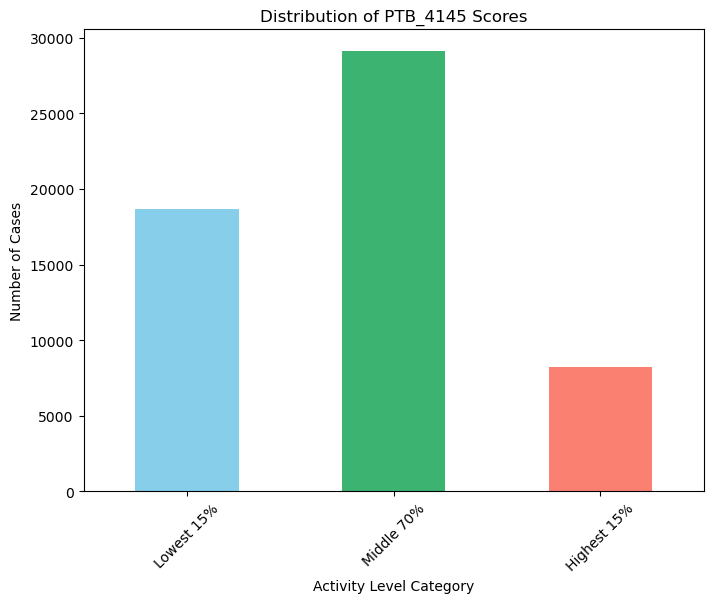

Lowest 15% Value Range: 1.0 to 4.0
Middle 70% Value Range: 4.0 to 7.0
Highest 15% Value Range: 7.0 to 10.0


In [46]:
# Calculate quantiles to find the thresholds for the lowest 15%, highest 15%, and the middle 70%
quantiles = dfg['ptb_4145'].quantile([0.15, 0.85])

# Use pd.cut to categorize the subjects based on the calculated quantiles
# We define explicit bins to ensure that the top 15% and bottom 15% are captured correctly, with the rest being the middle 70%
bins = [dfg['ptb_4145'].min(), quantiles[0.15], quantiles[0.85], dfg['ptb_4145'].max()]
labels = ['Lowest 15%', 'Middle 70%', 'Highest 15%']
dfg['ptb_4145_Group'] = pd.cut(dfg['ptb_4145'], bins=bins, labels=labels, include_lowest=True)

# Display the distribution of subjects across the groups
print(dfg['ptb_4145_Group'].value_counts(normalize=True))  # This will show the proportion of each group

# Count the number of cases in each group
group_counts = dfg['ptb_4145_Group'].value_counts()

# Sort the index to ensure the plot is ordered correctly
group_counts = group_counts.sort_index()

# Print the number of cases in each group
print(group_counts)

# Create the plot
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['skyblue', 'mediumseagreen', 'salmon'])

plt.title('Distribution of PTB_4145 Scores')
plt.xlabel('Activity Level Category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)

# Show the plot
plt.show()



# Extract the bins array used in pd.cut
bins = [dfg['ptb_4145'].min(), quantiles[0.15], quantiles[0.85], dfg['ptb_4145'].max()]

# Display the value ranges for each group
print(f"Lowest 15% Value Range: {bins[0]} to {bins[1]}")
print(f"Middle 70% Value Range: {bins[1]} to {bins[2]}")
print(f"Highest 15% Value Range: {bins[2]} to {bins[3]}")



##### Tertile with same number of cases inthree group in UCLA

Group
Highest 15%     9932
Lowest 15%      9932
Middle 70%     46351
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_96527/2656397968.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg_sorted['Group'] = 'Middle 70%'  # Default to middle


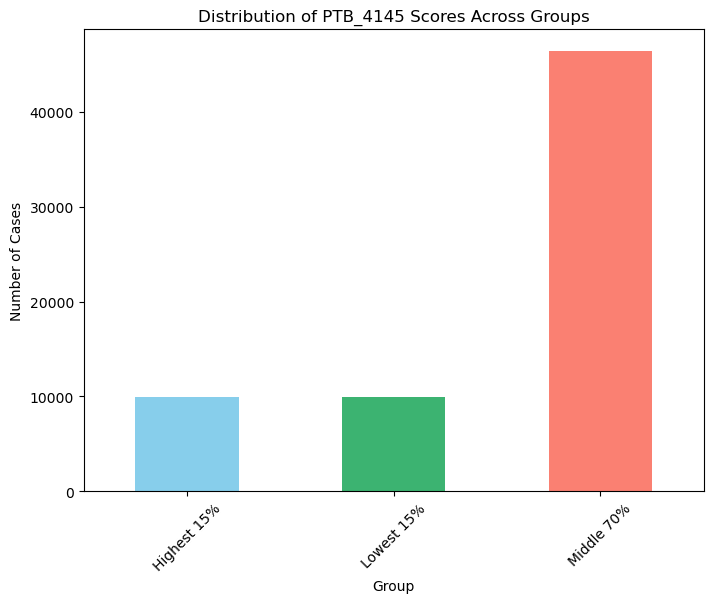

Lowest 15% Value Range: 1.0 to 4.0
Middle 70% Value Range: 4.0 to 10.0
Highest 15% Value Range: nan to nan


In [47]:
############################### UCLA tertile with same number of cases inthree group #############################
# Sort 'dfg' by 'ptb_4145' to ensure we can accurately pick the top and bottom 15%
dfg_sorted = dfg.sort_values(by='ptb_4145')

# Calculate the number of cases for each group
total_cases = len(dfg_sorted)
cases_15_percent = int(np.floor(total_cases * 0.15))  # Number of cases for 15%

# Assign groups
dfg_sorted['Group'] = 'Middle 70%'  # Default to middle
dfg_sorted.iloc[:cases_15_percent, dfg_sorted.columns.get_loc('Group')] = 'Lowest 15%'  # Bottom 15%
dfg_sorted.iloc[-cases_15_percent:, dfg_sorted.columns.get_loc('Group')] = 'Highest 15%'  # Top 15%

# Now, 'dfg_sorted' has a 'Group' column with the correct categorization

# Verify the distribution across the groups
group_counts = dfg_sorted['Group'].value_counts().sort_index()
print(group_counts)

# Plotting the result
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['skyblue', 'mediumseagreen', 'salmon'])
plt.title('Distribution of PTB_4145 Scores Across Groups')
plt.xlabel('Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()


# Determine the min and max 'V00PASE' values in each group
lowest_15_min_max = dfg_sorted[dfg_sorted['Group'] == 'Lowest 15%']['ptb_4145'].agg(['min', 'max'])
middle_70_min_max = dfg_sorted[dfg_sorted['Group'] == 'Middle 70%']['ptb_4145'].agg(['min', 'max'])
highest_15_min_max = dfg_sorted[dfg_sorted['Group'] == 'Highest 15%']['ptb_4145'].agg(['min', 'max'])

# Display the value ranges for each group
print(f"Lowest 15% Value Range: {lowest_15_min_max['min']} to {lowest_15_min_max['max']}")
print(f"Middle 70% Value Range: {middle_70_min_max['min']} to {middle_70_min_max['max']}")
print(f"Highest 15% Value Range: {highest_15_min_max['min']} to {highest_15_min_max['max']}")



##### Increase / Decrease

##### Tertile with same number of cases inthree group in PASE

Group
Highest 15%     646
Lowest 15%      646
Middle 70%     3015
Name: count, dtype: int64


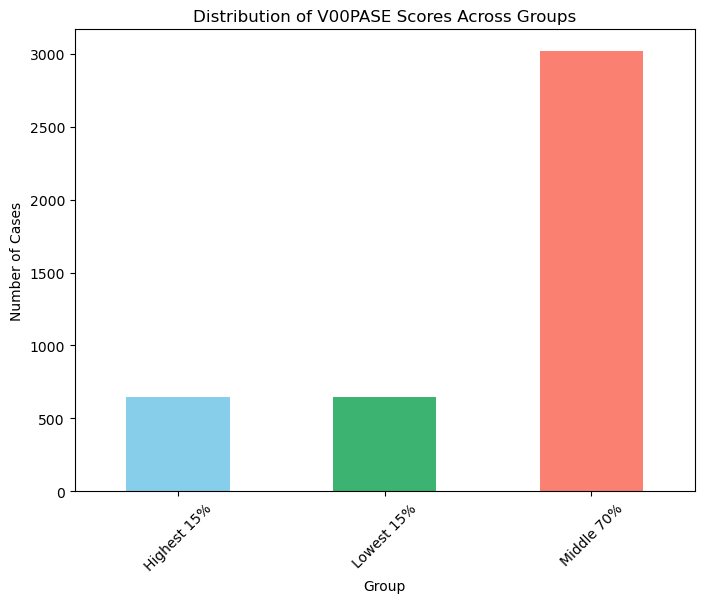

Lowest 15% Value Range: 0.0 to 76.0
Middle 70% Value Range: 76.0 to 252.0
Highest 15% Value Range: 252.0 to 531.0


In [48]:
############################### PASE tertile with same number of cases in three group #############################

# Sort 'df' by 'V00PASE' to ensure we can accurately pick the top and bottom 15%
df_sorted = df.sort_values(by='V00PASE')

# Calculate the number of cases for each group
total_cases = len(df_sorted)
cases_15_percent = int(np.floor(total_cases * 0.15))  # Number of cases for 15%

# Assign groups
df_sorted['Group'] = 'Middle 70%'  # Default to middle
df_sorted.iloc[:cases_15_percent, df_sorted.columns.get_loc('Group')] = 'Lowest 15%'  # Bottom 15%
df_sorted.iloc[-cases_15_percent:, df_sorted.columns.get_loc('Group')] = 'Highest 15%'  # Top 15%

# Verify the distribution across the groups
group_counts = df_sorted['Group'].value_counts().sort_index()
print(group_counts)

# Plotting the result
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['skyblue', 'mediumseagreen', 'salmon'])
plt.title('Distribution of V00PASE Scores Across Groups')
plt.xlabel('Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()



# Determine the min and max 'V00PASE' values in each group
lowest_15_min_max = df_sorted[df_sorted['Group'] == 'Lowest 15%']['V00PASE'].agg(['min', 'max'])
middle_70_min_max = df_sorted[df_sorted['Group'] == 'Middle 70%']['V00PASE'].agg(['min', 'max'])
highest_15_min_max = df_sorted[df_sorted['Group'] == 'Highest 15%']['V00PASE'].agg(['min', 'max'])

# Display the value ranges for each group
print(f"Lowest 15% Value Range: {lowest_15_min_max['min']} to {lowest_15_min_max['max']}")
print(f"Middle 70% Value Range: {middle_70_min_max['min']} to {middle_70_min_max['max']}")
print(f"Highest 15% Value Range: {highest_15_min_max['min']} to {highest_15_min_max['max']}")


##### Increased / Decreased

##### Tertiles based on the specified cut points (31–152 for tertile 1, 153–207 for tertile 2, and 208–368 for tertile 3 ): PASE

In [49]:
df.V01PASE.max()

580

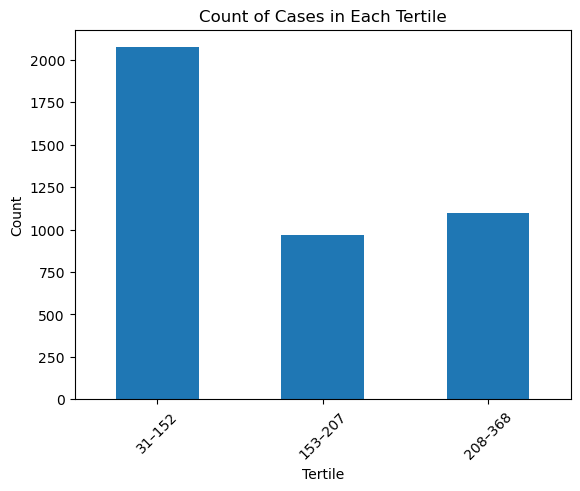

TertileBaselinePase
31–152     2074
153–207     969
208–368    1097
Name: count, dtype: int64


In [50]:
########### Baseline
# Adjust bins and labels to match the specified ranges correctly
# Correcting the approach to include only the relevant ranges
bins = [31, 152, 207, 368]  # Adjusted to start at 31 as per the original tertile definitions
labels = ['31–152', '153–207', '208–368']

# Now using pd.cut() with the corrected bins and labels
df['TertileBaselinePase'] = pd.cut(df['V00PASE'], bins=bins, labels=labels, include_lowest=True, right=True)

# Count the number of cases in each tertile
tertile_counts = df['TertileBaselinePase'].value_counts().sort_index()

# Plot the count
tertile_counts.plot(kind='bar')
plt.xlabel('Tertile')
plt.ylabel('Count')
plt.title('Count of Cases in Each Tertile')
plt.xticks(rotation=45)
plt.show()

tertile_counts = df['TertileBaselinePase'].value_counts().sort_index()

# Display the counts
print(tertile_counts)

In [51]:
df = df.dropna(subset=['TertileBaselinePase'])
print(df.TertileBaselinePase.unique())

['31–152', '153–207', '208–368']
Categories (3, object): ['31–152' < '153–207' < '208–368']


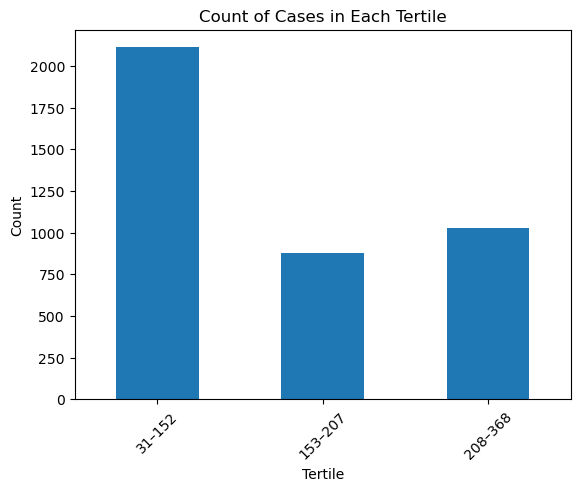

TertilefollowupPase
31–152     2111
153–207     875
208–368    1030
Name: count, dtype: int64


In [52]:
########### Follow up
# Adjust bins and labels to match the specified ranges correctly
# Correcting the approach to include only the relevant ranges
bins = [31, 152, 207, 368]  # Adjusted to start at 31 as per the original tertile definitions
labels = ['31–152', '153–207', '208–368']

# Now using pd.cut() with the corrected bins and labels
df['TertilefollowupPase'] = pd.cut(df['V01PASE'], bins=bins, labels=labels, include_lowest=True, right=True)

# Count the number of cases in each tertile
tertile_counts = df['TertilefollowupPase'].value_counts().sort_index()

# Plot the count
tertile_counts.plot(kind='bar')
plt.xlabel('Tertile')
plt.ylabel('Count')
plt.title('Count of Cases in Each Tertile')
plt.xticks(rotation=45)
plt.show()

tertile_counts = df['TertilefollowupPase'].value_counts().sort_index()

# Display the counts
print(tertile_counts)

In [53]:
df = df.dropna(subset=['TertilefollowupPase'])
print(df.TertilefollowupPase.unique())

['31–152', '153–207', '208–368']
Categories (3, object): ['31–152' < '153–207' < '208–368']


##### Increase / Decrease

##### Tertiles based on the specified cut points (1,2,3,4 for tertile 1, 5,6 for tertile 2, and 7,8,9 for tertile 3 ): UCLA based on Linda's paper

ptb_4145_tertiles
Tertile 1    18701
Tertile 2    21297
Tertile 3    16010
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_96527/152584412.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['ptb_4145_tertiles'] = dfg['ptb_4145'].apply(categorize_into_tertiles)


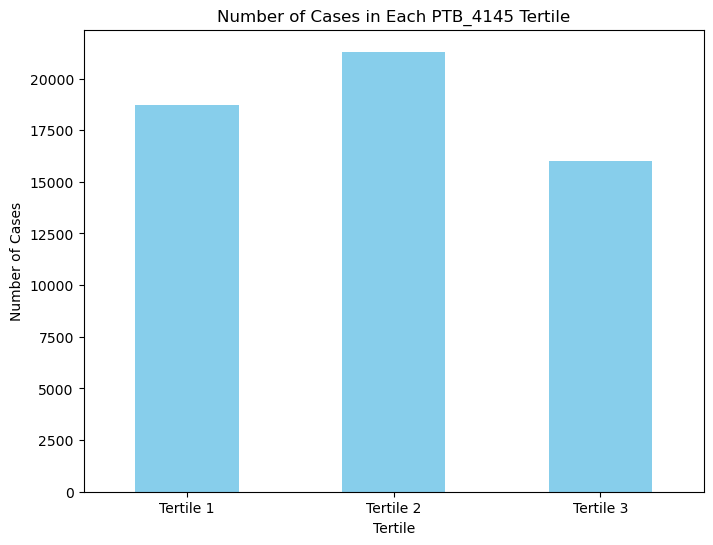

In [54]:
# Function to categorize 'ptb_4145' scores into tertiles
def categorize_into_tertiles(value):
    if value in [1, 2, 3, 4]:
        return 'Tertile 1'
    elif value in [5, 6]:
        return 'Tertile 2'
    elif value in [7, 8, 9, 10]:
        return 'Tertile 3'

# Apply the function to categorize each 'ptb_4145' score
dfg['ptb_4145_tertiles'] = dfg['ptb_4145'].apply(categorize_into_tertiles)

# Verify the distribution across tertiles
tertile_distribution = dfg['ptb_4145_tertiles'].value_counts().sort_index()
print(tertile_distribution)

# Plot the distribution of 'ptb_4145' scores across tertiles
plt.figure(figsize=(8, 6))
tertile_distribution.plot(kind='bar', color='skyblue')

plt.title('Number of Cases in Each PTB_4145 Tertile')
plt.xlabel('Tertile')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)

plt.show()